In [1]:
#importing the important library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [2]:
pwd

'/Users/sanju/Documents/DS/Assingment/ImagoAI/research'

In [3]:
import os
os.chdir("..")

In [4]:
pwd

'/Users/sanju/Documents/DS/Assingment/ImagoAI'

In [5]:
data=pd.read_csv("data/TASK-ML-INTERN.csv")

In [6]:
data.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [7]:
data.select_dtypes("object").value_counts()

hsi_id          
imagoai_corn_385    2
imagoai_corn_443    2
imagoai_corn_395    2
imagoai_corn_0      1
imagoai_corn_394    1
                   ..
imagoai_corn_243    1
imagoai_corn_242    1
imagoai_corn_241    1
imagoai_corn_240    1
imagoai_corn_99     1
Name: count, Length: 497, dtype: int64

In [8]:
data.shape

(500, 450)

In [9]:
data.select_dtypes("object").value_counts()

hsi_id          
imagoai_corn_385    2
imagoai_corn_443    2
imagoai_corn_395    2
imagoai_corn_0      1
imagoai_corn_394    1
                   ..
imagoai_corn_243    1
imagoai_corn_242    1
imagoai_corn_241    1
imagoai_corn_240    1
imagoai_corn_99     1
Name: count, Length: 497, dtype: int64

In [10]:
#as there is no such repetation means this is useless data thus we can just drop this
data=data.drop("hsi_id",axis=
               1)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 449 entries, 0 to vomitoxin_ppb
dtypes: float64(449)
memory usage: 1.7 MB


In [12]:
data.describe().transpose().head(20)

,count,mean,std,min,25%,50%,75%,max
0,500.0,0.443118,0.044719,0.311182,0.410456,0.449105,0.480245,0.556287
1,500.0,0.440761,0.045520,0.295321,0.404310,0.442651,0.478822,0.530168
2,500.0,0.433814,0.045764,0.284064,0.397038,0.434215,0.473158,0.528774
3,500.0,0.426122,0.046070,0.282054,0.389029,0.425074,0.464947,0.533202
4,500.0,0.418990,0.045405,0.296702,0.382102,0.417075,0.459232,0.511909
5,500.0,0.412432,0.044727,0.286860,0.377157,0.411872,0.452198,0.501786
6,500.0,0.405868,0.044528,0.262876,0.369620,0.405443,0.444384,0.504054
7,500.0,0.399815,0.043773,0.278523,0.364823,0.397917,0.438728,0.490692
8,500.0,0.394038,0.043659,0.255529,0.360634,0.393803,0.431165,0.489272
9,500.0,0.389664,0.043442,0.261459,0.355246,0.387211,0.427039,0.472080


In [13]:
## drop the duplicates 
data=data.drop_duplicates()
data.shape

(500, 449)

In [14]:
## checking for null values
list(data.isnull().sum().values>0)

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [15]:
for i in list(data.isnull().sum().values>0):
    if i!=False:
        print(i)

thus here are no such values are present in the dataset

In [16]:
data.shape

(500, 449)

In [17]:
## as there are hight number are columns are present we need to just remove the number of features by the help of feature reduction techquies

In [18]:
data.shape

(500, 449)

## the main way for the feature reductions are 
1. variance threshold
2. pca(principal component analysis)
3. correlation-based feature reduction

In [19]:
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,0.416181,0.396844,0.408985,0.372865,0.385293,0.36539,0.355226,0.34335,0.344837,0.361567,...,0.71028,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.70452,1100.0


In [20]:
import pandas as pd

def remove_outliers_iqr(data, columns):
    
    filtered_data = data.copy()  # Make a copy to avoid modifying original data
    
    for col in columns:
        Q1 = filtered_data[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = filtered_data[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter data by removing outliers
        filtered_data = filtered_data[(filtered_data[col] >= lower_bound) & (filtered_data[col] <= upper_bound)]
    
    return filtered_data

In [21]:
data.shape

(500, 449)

In [22]:
data=remove_outliers_iqr(data,data.columns)

In [23]:
## before using some kinda feature engineering technuqies we need to split the data for training and test
from sklearn.model_selection import train_test_split

In [24]:
X=data.drop("vomitoxin_ppb",axis=1)
y=data["vomitoxin_ppb"]

In [25]:
y

0      1100.0
1      1000.0
3      1300.0
4       220.0
5      1400.0
        ...  
495    1200.0
496       0.0
497       0.0
498       0.0
499    1400.0
Name: vomitoxin_ppb, Length: 377, dtype: float64

In [26]:
X

,0,1,2,3,4,5,6,7,8,9,...,438,439,440,441,442,443,444,445,446,447
0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,0.361567,...,0.680883,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520
1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,0.359674,...,0.701600,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054
3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,0.413106,...,0.728588,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474
4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,0.430482,...,0.779194,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988
5,0.403326,0.399065,0.392410,0.393671,0.375779,0.369329,0.366484,0.379903,0.329242,0.328310,...,0.706395,0.703310,0.698116,0.695797,0.697344,0.694916,0.682640,0.675877,0.695633,0.694361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,0.402912,...,0.741594,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839
496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,0.327545,...,0.642285,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733
497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,0.437731,...,0.784919,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187
498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,0.427200,...,0.748725,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383


In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,438,439,440,441,442,443,444,445,446,447
185,0.410470,0.421201,0.414632,0.403967,0.399269,0.384519,0.370877,0.397811,0.386557,0.366075,...,0.726803,0.733147,0.715414,0.725675,0.724070,0.723894,0.713833,0.721717,0.715041,0.705468
138,0.416443,0.425410,0.408128,0.407111,0.409690,0.407037,0.398082,0.388073,0.393847,0.379727,...,0.736862,0.736100,0.719525,0.734980,0.725234,0.737978,0.738073,0.732134,0.730637,0.717978
471,0.394542,0.390248,0.375270,0.370886,0.366606,0.362175,0.339803,0.354116,0.312218,0.309274,...,0.664644,0.659460,0.668594,0.678759,0.687071,0.688970,0.665476,0.665128,0.659555,0.666898
264,0.413046,0.392387,0.391222,0.366557,0.375884,0.370943,0.382326,0.350537,0.356278,0.334848,...,0.678396,0.679982,0.677763,0.687513,0.671550,0.664396,0.671231,0.677359,0.676707,0.672891
296,0.443941,0.435136,0.418955,0.413294,0.409613,0.402703,0.373448,0.377110,0.389930,0.370247,...,0.716112,0.730609,0.727735,0.715175,0.730528,0.717700,0.710372,0.719604,0.723409,0.712957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.379239,0.406203,0.386867,0.385009,0.358496,0.370900,0.369636,0.349123,0.351925,0.323648,...,0.728332,0.715691,0.700187,0.717333,0.731239,0.705320,0.722879,0.727319,0.713457,0.740697
143,0.500862,0.492275,0.490725,0.460117,0.477104,0.455609,0.440978,0.444444,0.430455,0.465328,...,0.781802,0.777362,0.760803,0.771147,0.751554,0.775155,0.765390,0.769653,0.770516,0.759185
367,0.479901,0.455791,0.473895,0.468164,0.452263,0.459258,0.425658,0.433820,0.403341,0.423809,...,0.766255,0.755494,0.761154,0.755472,0.754362,0.758793,0.754932,0.758197,0.751408,0.747076
465,0.474963,0.481675,0.492826,0.476480,0.474876,0.461786,0.460837,0.432999,0.438600,0.432748,...,0.789037,0.764032,0.796441,0.783398,0.792910,0.775394,0.774498,0.763479,0.768352,0.758593


In [29]:
X_test.shape

(76, 448)

In [30]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,438,439,440,441,442,443,444,445,446,447
185,0.410470,0.421201,0.414632,0.403967,0.399269,0.384519,0.370877,0.397811,0.386557,0.366075,...,0.726803,0.733147,0.715414,0.725675,0.724070,0.723894,0.713833,0.721717,0.715041,0.705468
138,0.416443,0.425410,0.408128,0.407111,0.409690,0.407037,0.398082,0.388073,0.393847,0.379727,...,0.736862,0.736100,0.719525,0.734980,0.725234,0.737978,0.738073,0.732134,0.730637,0.717978
471,0.394542,0.390248,0.375270,0.370886,0.366606,0.362175,0.339803,0.354116,0.312218,0.309274,...,0.664644,0.659460,0.668594,0.678759,0.687071,0.688970,0.665476,0.665128,0.659555,0.666898
264,0.413046,0.392387,0.391222,0.366557,0.375884,0.370943,0.382326,0.350537,0.356278,0.334848,...,0.678396,0.679982,0.677763,0.687513,0.671550,0.664396,0.671231,0.677359,0.676707,0.672891
296,0.443941,0.435136,0.418955,0.413294,0.409613,0.402703,0.373448,0.377110,0.389930,0.370247,...,0.716112,0.730609,0.727735,0.715175,0.730528,0.717700,0.710372,0.719604,0.723409,0.712957


In [31]:
import numpy as np

corr_matrix = X_train.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation above threshold (e.g., 0.9)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
data.drop(columns=to_drop, inplace=True)

print(f"Dropped {len(to_drop)} highly correlated features")

Dropped 421 highly correlated features


In [32]:
corr_matrix = X_train.corr().abs()
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,438,439,440,441,442,443,444,445,446,447
0,1.000000,0.939916,0.928305,0.925617,0.927947,0.921109,0.914744,0.905645,0.911523,0.907073,...,0.655131,0.633737,0.659252,0.643774,0.650883,0.665373,0.651018,0.647174,0.659298,0.655940
1,0.939916,1.000000,0.942863,0.937959,0.937414,0.935667,0.921729,0.921194,0.925426,0.925612,...,0.695228,0.682039,0.696117,0.683818,0.696156,0.704270,0.686022,0.692778,0.698758,0.697604
2,0.928305,0.942863,1.000000,0.943735,0.937952,0.938842,0.931580,0.934063,0.927819,0.922437,...,0.679276,0.656751,0.671204,0.662767,0.675883,0.685579,0.665160,0.666971,0.676682,0.687348
3,0.925617,0.937959,0.943735,1.000000,0.940984,0.941680,0.925216,0.931193,0.925334,0.923119,...,0.713733,0.697040,0.705052,0.690606,0.701296,0.712954,0.697123,0.698291,0.696601,0.709462
4,0.927947,0.937414,0.937952,0.940984,1.000000,0.941672,0.933563,0.930100,0.929696,0.934867,...,0.675155,0.666780,0.676994,0.660149,0.673808,0.691134,0.666940,0.668457,0.669894,0.683540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,0.665373,0.704270,0.685579,0.712954,0.691134,0.696144,0.710290,0.726618,0.736817,0.741028,...,0.950996,0.951397,0.954387,0.954421,0.956598,1.000000,0.957560,0.959848,0.957282,0.959742
444,0.651018,0.686022,0.665160,0.697123,0.666940,0.677324,0.696380,0.715627,0.718340,0.729570,...,0.948712,0.955517,0.954265,0.954551,0.956167,0.957560,1.000000,0.958345,0.956804,0.958770
445,0.647174,0.692778,0.666971,0.698291,0.668457,0.677626,0.700307,0.713780,0.728858,0.729249,...,0.947459,0.958769,0.952925,0.951874,0.952940,0.959848,0.958345,1.000000,0.956928,0.956627
446,0.659298,0.698758,0.676682,0.696601,0.669894,0.682027,0.701250,0.717560,0.722685,0.728899,...,0.948027,0.953274,0.948085,0.952248,0.947688,0.957282,0.956804,0.956928,1.000000,0.953771


In [33]:
corr_matrix.shape

(448, 448)

In [34]:
np.triu(np.ones(corr_matrix.shape),1).astype(bool)

array([[False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False]])

In [35]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [36]:
X_train.corr().abs()

,0,1,2,3,4,5,6,7,8,9,...,438,439,440,441,442,443,444,445,446,447
0,1.000000,0.939916,0.928305,0.925617,0.927947,0.921109,0.914744,0.905645,0.911523,0.907073,...,0.655131,0.633737,0.659252,0.643774,0.650883,0.665373,0.651018,0.647174,0.659298,0.655940
1,0.939916,1.000000,0.942863,0.937959,0.937414,0.935667,0.921729,0.921194,0.925426,0.925612,...,0.695228,0.682039,0.696117,0.683818,0.696156,0.704270,0.686022,0.692778,0.698758,0.697604
2,0.928305,0.942863,1.000000,0.943735,0.937952,0.938842,0.931580,0.934063,0.927819,0.922437,...,0.679276,0.656751,0.671204,0.662767,0.675883,0.685579,0.665160,0.666971,0.676682,0.687348
3,0.925617,0.937959,0.943735,1.000000,0.940984,0.941680,0.925216,0.931193,0.925334,0.923119,...,0.713733,0.697040,0.705052,0.690606,0.701296,0.712954,0.697123,0.698291,0.696601,0.709462
4,0.927947,0.937414,0.937952,0.940984,1.000000,0.941672,0.933563,0.930100,0.929696,0.934867,...,0.675155,0.666780,0.676994,0.660149,0.673808,0.691134,0.666940,0.668457,0.669894,0.683540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,0.665373,0.704270,0.685579,0.712954,0.691134,0.696144,0.710290,0.726618,0.736817,0.741028,...,0.950996,0.951397,0.954387,0.954421,0.956598,1.000000,0.957560,0.959848,0.957282,0.959742
444,0.651018,0.686022,0.665160,0.697123,0.666940,0.677324,0.696380,0.715627,0.718340,0.729570,...,0.948712,0.955517,0.954265,0.954551,0.956167,0.957560,1.000000,0.958345,0.956804,0.958770
445,0.647174,0.692778,0.666971,0.698291,0.668457,0.677626,0.700307,0.713780,0.728858,0.729249,...,0.947459,0.958769,0.952925,0.951874,0.952940,0.959848,0.958345,1.000000,0.956928,0.956627
446,0.659298,0.698758,0.676682,0.696601,0.669894,0.682027,0.701250,0.717560,0.722685,0.728899,...,0.948027,0.953274,0.948085,0.952248,0.947688,0.957282,0.956804,0.956928,1.000000,0.953771


In [37]:
corr_matrix.shape

(448, 448)

In [38]:
mask=np.triu(np.ones((10,10)),k=1).astype(bool)

In [39]:
upper_triangle=corr_matrix.iloc[:10,:10].where(mask)

In [40]:
upper_triangle[upper_triangle>0.92].columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')

In [41]:
X_train.shape

(301, 448)

In [42]:
import numpy as np

corr_matrix = X_train.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation above threshold (e.g., 0.9)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.96)]
X_train=X_train.drop(columns=to_drop)

print(f"Dropped {len(to_drop)} highly correlated features")

Dropped 270 highly correlated features


In [43]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,436,437,438,439,440,441,442,445,446,447
185,0.410470,0.421201,0.414632,0.403967,0.399269,0.384519,0.370877,0.397811,0.386557,0.366075,...,0.720098,0.731504,0.726803,0.733147,0.715414,0.725675,0.724070,0.721717,0.715041,0.705468
138,0.416443,0.425410,0.408128,0.407111,0.409690,0.407037,0.398082,0.388073,0.393847,0.379727,...,0.748749,0.736266,0.736862,0.736100,0.719525,0.734980,0.725234,0.732134,0.730637,0.717978
471,0.394542,0.390248,0.375270,0.370886,0.366606,0.362175,0.339803,0.354116,0.312218,0.309274,...,0.677208,0.646610,0.664644,0.659460,0.668594,0.678759,0.687071,0.665128,0.659555,0.666898
264,0.413046,0.392387,0.391222,0.366557,0.375884,0.370943,0.382326,0.350537,0.356278,0.334848,...,0.679364,0.670097,0.678396,0.679982,0.677763,0.687513,0.671550,0.677359,0.676707,0.672891
296,0.443941,0.435136,0.418955,0.413294,0.409613,0.402703,0.373448,0.377110,0.389930,0.370247,...,0.724743,0.711504,0.716112,0.730609,0.727735,0.715175,0.730528,0.719604,0.723409,0.712957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.379239,0.406203,0.386867,0.385009,0.358496,0.370900,0.369636,0.349123,0.351925,0.323648,...,0.737500,0.742841,0.728332,0.715691,0.700187,0.717333,0.731239,0.727319,0.713457,0.740697
143,0.500862,0.492275,0.490725,0.460117,0.477104,0.455609,0.440978,0.444444,0.430455,0.465328,...,0.786917,0.773619,0.781802,0.777362,0.760803,0.771147,0.751554,0.769653,0.770516,0.759185
367,0.479901,0.455791,0.473895,0.468164,0.452263,0.459258,0.425658,0.433820,0.403341,0.423809,...,0.763525,0.761949,0.766255,0.755494,0.761154,0.755472,0.754362,0.758197,0.751408,0.747076
465,0.474963,0.481675,0.492826,0.476480,0.474876,0.461786,0.460837,0.432999,0.438600,0.432748,...,0.779677,0.786122,0.789037,0.764032,0.796441,0.783398,0.792910,0.763479,0.768352,0.758593


In [44]:
X_train.shape

(301, 178)

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)
print(f"Reduced from {X_train.shape[1]} to {X_train.shape[1]} dimensions")
print(f"Reduced from {X_test.shape[1]} to {X_test.shape[1]} dimensions")


Reduced from 30 to 30 dimensions
Reduced from 30 to 30 dimensions


In [46]:
X_train

array([[-0.20600287,  0.07543854, -0.0746934 , ...,  0.00413869,
         0.01785856,  0.00211217],
       [-0.07272862, -0.07831127, -0.02287799, ..., -0.00841608,
         0.00105906,  0.02761667],
       [-0.7067462 ,  0.03070283, -0.06671675, ..., -0.02426671,
        -0.02128444, -0.01602164],
       ...,
       [-0.06623256,  0.07663965,  0.15165983, ...,  0.00241719,
         0.00336262, -0.00100623],
       [ 0.62246379,  0.11412094, -0.07831903, ...,  0.01626995,
        -0.01962905, -0.00095392],
       [ 0.18876134,  0.11741021, -0.20017084, ...,  0.00903869,
        -0.00977329, -0.0080263 ]])

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [48]:
X_train=scaler.transform(X_train)

In [49]:
y_train.shape

(301,)

In [50]:
print(X_train.shape)
print(X_test.shape)

(301, 30)
(76, 30)


In [51]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Support Vector Regressor (SVR)": SVR(),
    "XGBoost Regressor": XGBRegressor(eval_metric='rmse'),
}

In [52]:
y_train.shape

(301,)

In [53]:
## as the model is overfitting or underfitting we need to do the hyperparametertuning

In [54]:
models_params = {
    "Ridge Regression": {
        "model": Ridge(),
        "params": {"alpha": [0.01, 0.1, 1, 10, 100]}
    },
    "Lasso Regression": {
        "model": Lasso(),
        "params": {"alpha": [0.001, 0.01, 0.1, 1, 10]}
    },
    "ElasticNet Regression": {
        "model": ElasticNet(),
        "params": {"alpha": [0.001, 0.01, 0.1, 1], "l1_ratio": [0.1, 0.5, 0.9]}
    },
    "Random Forest Regressor": {
        "model": RandomForestRegressor(),
        "params": {
            "n_estimators": [50, 100, 200], 
            "max_depth": [5, 10, 20, None], 
            "min_samples_split": [2, 5, 10]
        }
    },
    "Gradient Boosting Regressor": {
        "model": GradientBoostingRegressor(),
        "params": {
            "n_estimators": [50, 100, 200], 
            "learning_rate": [0.01, 0.1, 0.2], 
            "max_depth": [3, 5, 10]
        }
    },
    "Support Vector Regressor (SVR)": {
        "model": SVR(),
        "params": {
            "C": [0.1, 1, 10, 100], 
            "epsilon": [0.01, 0.1, 1], 
            "kernel": ["linear", "rbf"]
        }
    },
    "XGBoost Regressor": {
        "model": XGBRegressor(eval_metric='rmse'),
        "params": {
            "n_estimators": [50, 100, 200], 
            "learning_rate": [0.01, 0.1, 0.2], 
            "max_depth": [3, 6, 9]
        }
    }
}

In [55]:
models

{'Linear Regression': LinearRegression(),
 'Ridge Regression': Ridge(),
 'Lasso Regression': Lasso(),
 'ElasticNet Regression': ElasticNet(),
 'Random Forest Regressor': RandomForestRegressor(),
 'Gradient Boosting Regressor': GradientBoostingRegressor(),
 'Support Vector Regressor (SVR)': SVR(),
 'XGBoost Regressor': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=No

In [56]:
models_params

{'Ridge Regression': {'model': Ridge(),
  'params': {'alpha': [0.01, 0.1, 1, 10, 100]}},
 'Lasso Regression': {'model': Lasso(),
  'params': {'alpha': [0.001, 0.01, 0.1, 1, 10]}},
 'ElasticNet Regression': {'model': ElasticNet(),
  'params': {'alpha': [0.001, 0.01, 0.1, 1], 'l1_ratio': [0.1, 0.5, 0.9]}},
 'Random Forest Regressor': {'model': RandomForestRegressor(),
  'params': {'n_estimators': [50, 100, 200],
   'max_depth': [5, 10, 20, None],
   'min_samples_split': [2, 5, 10]}},
 'Gradient Boosting Regressor': {'model': GradientBoostingRegressor(),
  'params': {'n_estimators': [50, 100, 200],
   'learning_rate': [0.01, 0.1, 0.2],
   'max_depth': [3, 5, 10]}},
 'Support Vector Regressor (SVR)': {'model': SVR(),
  'params': {'C': [0.1, 1, 10, 100],
   'epsilon': [0.01, 0.1, 1],
   'kernel': ['linear', 'rbf']}},
 'XGBoost Regressor': {'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsamp

In [57]:
list(models_params.values())[-1]

{'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...),
 'params': {'n_estimators': [50, 100, 200],
  'learning_rate': [0.01, 0.1, 0.2],
  'max_depth': [3, 6, 9]}}

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [59]:
list(models_params.keys())[0]

'Ridge Regression'

In [60]:
def evaluate_regression(y_true, y_pred):
    # Calculate Metrics
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    # Print Metrics
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

    # Visualization: Scatter Plot of Actual vs. Predicted Values
    plt.figure(figsize=(7, 5))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.6, label="Predicted vs Actual")
    plt.plot(y_true, y_true, color='red', linestyle='--', label="Perfect Fit")  # Ideal line
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs. Predicted Values")
    plt.legend()
    plt.show()

    return {"MAE": mae, "RMSE": rmse, "R2": r2}

In [61]:
models_params

{'Ridge Regression': {'model': Ridge(),
  'params': {'alpha': [0.01, 0.1, 1, 10, 100]}},
 'Lasso Regression': {'model': Lasso(),
  'params': {'alpha': [0.001, 0.01, 0.1, 1, 10]}},
 'ElasticNet Regression': {'model': ElasticNet(),
  'params': {'alpha': [0.001, 0.01, 0.1, 1], 'l1_ratio': [0.1, 0.5, 0.9]}},
 'Random Forest Regressor': {'model': RandomForestRegressor(),
  'params': {'n_estimators': [50, 100, 200],
   'max_depth': [5, 10, 20, None],
   'min_samples_split': [2, 5, 10]}},
 'Gradient Boosting Regressor': {'model': GradientBoostingRegressor(),
  'params': {'n_estimators': [50, 100, 200],
   'learning_rate': [0.01, 0.1, 0.2],
   'max_depth': [3, 5, 10]}},
 'Support Vector Regressor (SVR)': {'model': SVR(),
  'params': {'C': [0.1, 1, 10, 100],
   'epsilon': [0.01, 0.1, 1],
   'kernel': ['linear', 'rbf']}},
 'XGBoost Regressor': {'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsamp

In [ ]:
def model_performance(y_true, y_pred):
    # Calculate Metrics
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    eval_mat={
        "mae":mae,
        "rmse":rmse,
            "r2":r2    }
    return eval_mat

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Mean Absolute Error (MAE): 581.6599
Root Mean Squared Error (RMSE): 775.1956
R² Score: 0.0266


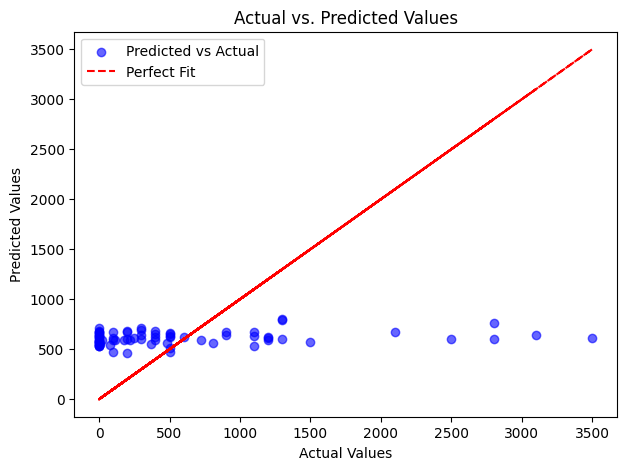

Best Ridge Regression Parameters: {'alpha': 100}
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Mean Absolute Error (MAE): 579.8160
Root Mean Squared Error (RMSE): 773.3693
R² Score: 0.0312


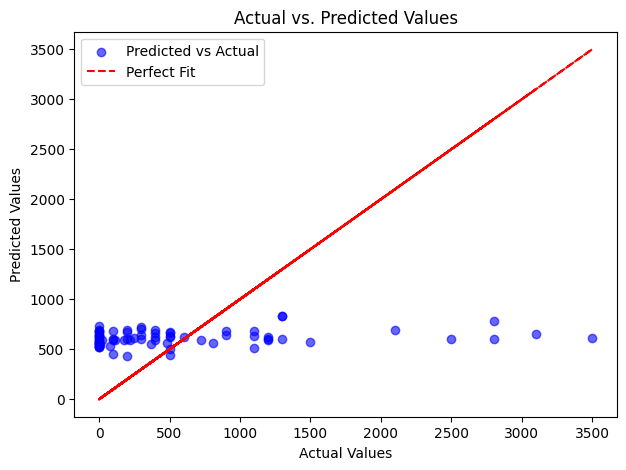

Best Lasso Regression Parameters: {'alpha': 10}
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Mean Absolute Error (MAE): 584.9610
Root Mean Squared Error (RMSE): 778.6030
R² Score: 0.0180


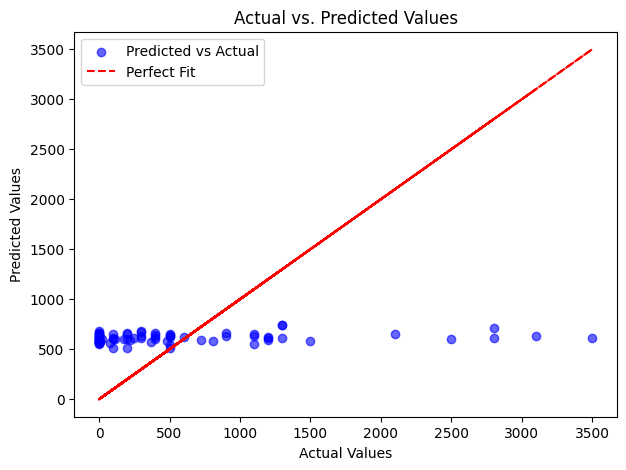

Best ElasticNet Regression Parameters: {'alpha': 1, 'l1_ratio': 0.1}
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Mean Absolute Error (MAE): 517.0616
Root Mean Squared Error (RMSE): 807.8543
R² Score: -0.0571


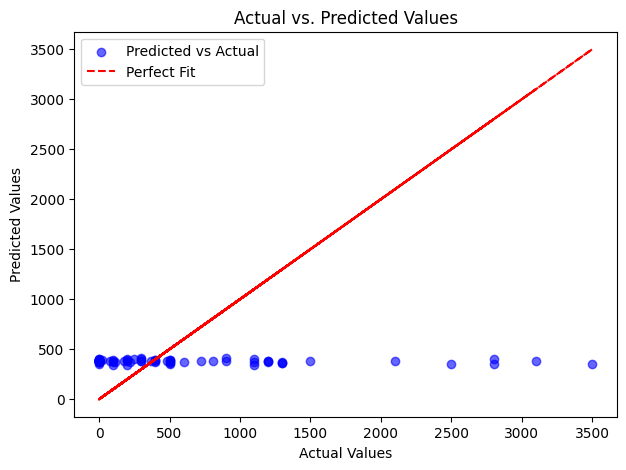

Best Random Forest Regressor Parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50}
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Mean Absolute Error (MAE): 566.7645
Root Mean Squared Error (RMSE): 794.8569
R² Score: -0.0234


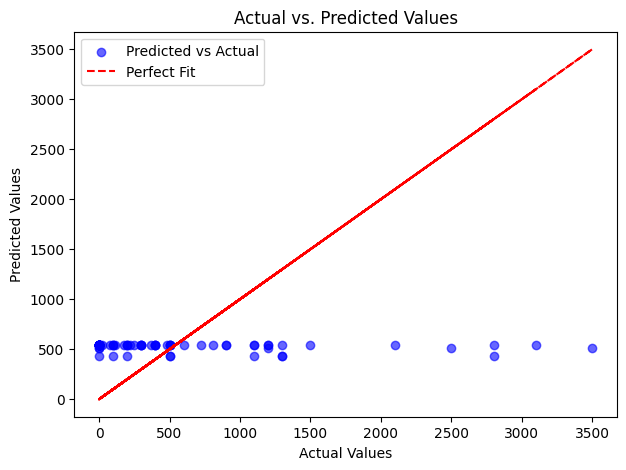

Best Gradient Boosting Regressor Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Mean Absolute Error (MAE): 516.7553
Root Mean Squared Error (RMSE): 784.5609
R² Score: 0.0029


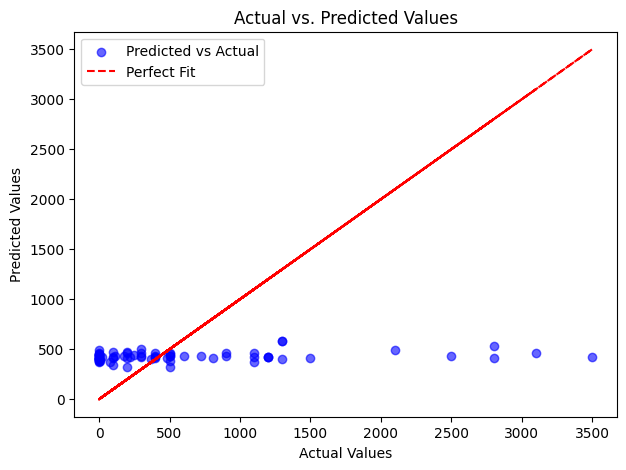

Best Support Vector Regressor (SVR) Parameters: {'C': 100, 'epsilon': 0.1, 'kernel': 'linear'}
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Mean Absolute Error (MAE): 556.4922
Root Mean Squared Error (RMSE): 793.9860
R² Score: -0.0212


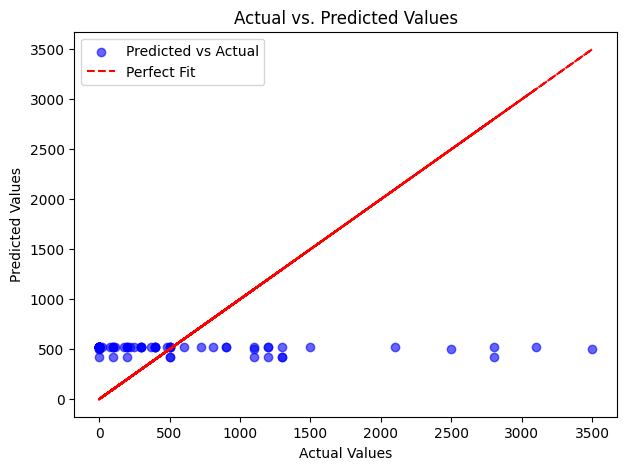

Best XGBoost Regressor Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [71]:
model_metrics={}
for i in range(len(models_params)):
    model_name=list(models_params.keys())[i]
    model=list(models_params.values())[i]["model"]
    params=list(models_params.values())[i]["params"]
    grid_search = GridSearchCV(model, params, cv=3, scoring="neg_mean_squared_error", verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    # Store best model
    best_model = grid_search.best_estimator_
    
    # Evaluate on test datata
    y_pred = best_model.predict(X_test)
    evaluate_regression(y_test,y_pred)
    model_perfome=model_performance(y_test,y_pred)    
    
    print(f"Best {model_name} Parameters: {grid_search.best_params_}")
    model_metrics[model_name]=model_perfome
    

In [75]:
model_metrics

{'Ridge Regression': {'mae': 581.659894478797,
  'rmse': 775.1956042588441,
  'r2': 0.026610120208320986},
 'Lasso Regression': {'mae': 579.8160360356555,
  'rmse': 773.3692745839955,
  'r2': 0.031191252200648778},
 'ElasticNet Regression': {'mae': 584.9610470092441,
  'rmse': 778.6030408809096,
  'r2': 0.01803408117473626},
 'Random Forest Regressor': {'mae': 517.0615844915354,
  'rmse': 807.8543491993931,
  'r2': -0.05713477321002891},
 'Gradient Boosting Regressor': {'mae': 566.7645295012422,
  'rmse': 794.8568585925981,
  'r2': -0.02339213697073772},
 'Support Vector Regressor (SVR)': {'mae': 516.7553411485366,
  'rmse': 784.5608768930457,
  'r2': 0.002948665178332144},
 'XGBoost Regressor': {'mae': 556.4922457243267,
  'rmse': 793.9859737568931,
  'r2': -0.02115080652039114}}

In [ ]:
pd.DataFrame(model_metrics)
    

,Ridge Regression,Lasso Regression,ElasticNet Regression,Random Forest Regressor,Gradient Boosting Regressor,Support Vector Regressor (SVR),XGBoost Regressor
mae,581.659894,579.816036,584.961047,517.061584,566.764530,516.755341,556.492246
rmse,775.195604,773.369275,778.603041,807.854349,794.856859,784.560877,793.985974
r2,0.026610,0.031191,0.018034,-0.057135,-0.023392,0.002949,-0.021151


In [89]:
# Find the best model based on the highest R² score
best_model = max(model_metrics, key=lambda model: model_metrics[model]['r2'])
best_score = model_metrics[best_model]['r2']

# Print the best model
print(f"Best Model: {best_model}")
print(f"   - R² Score: {best_score:.4f}")
print(f"   - MAE: {model_metrics[best_model]['mae']:.2f}")
print(f"   - RMSE: {model_metrics[best_model]['rmse']:.2f}")

Best Model: Lasso Regression
   - R² Score: 0.0312
   - MAE: 579.82
   - RMSE: 773.37
